#Fake News Classification



1.   Install necessary tools
2.   Preprocess data
3.   Construct model
4.   Output data



### 1: Installing necessary tools & data

In [13]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [24]:
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [27]:
!ls


fakenewskdd2020.zip


In [28]:
!unzip \*.zip  && rm *.zip


Archive:  fakenewskdd2020.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
train = pd.read_csv('train.csv', sep='\t', encoding='utf-8')
test = pd.read_csv('test.csv', sep='\t', encoding='utf-8')

In [32]:
train.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


### 2: Preprocessing data by spaCy pipeline

In [33]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
!-m spacy download en_core_sci_sm

/bin/bash: - : invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [48]:
import en_core_web_sm
import spacy
import re

In [49]:
 nlp = spacy.load("en_core_web_sm")
 stopwords = nlp.Defaults.stop_words

In [45]:
train.shape

(4987, 2)

In [46]:
test.shape

(1247, 2)

In [50]:
train['text'].loc[0]

'Get the latest from TODAY Sign up for our newsletter  No one ever truly gets over losing a loved one, and Blake Shelton is no exception. He was just 14 when his older brother Richie died on Nov. 13, 1990. And, as Shelton noted in a tweet Monday, "It changed my life forever."  Richie was 24 when he died in a car accident in the Sheltons\' home state of Oklahoma. Two years ago, Shelton sent out a message for the 25th anniversary of his loss:  Richie, who was Blake\'s half-brother (they shared a mother), was a passenger in a car that collided with a school bus in Ada, south of Oklahoma City.  Richie, driver Redena McManus and a 3-year-old boy, Christopher McManus, all died during or shortly after the collision, while the bus driver and passengers were uninjured, according to police reports.  The accident has clearly remained with Blake, who told 60 Minutes in 2014, "I remember picking up the phone to call him a week after he was dead, to tell him something. I was picking up the phone to 

In [51]:
train.text.loc[ : 5].values.tolist()[0]

'Get the latest from TODAY Sign up for our newsletter  No one ever truly gets over losing a loved one, and Blake Shelton is no exception. He was just 14 when his older brother Richie died on Nov. 13, 1990. And, as Shelton noted in a tweet Monday, "It changed my life forever."  Richie was 24 when he died in a car accident in the Sheltons\' home state of Oklahoma. Two years ago, Shelton sent out a message for the 25th anniversary of his loss:  Richie, who was Blake\'s half-brother (they shared a mother), was a passenger in a car that collided with a school bus in Ada, south of Oklahoma City.  Richie, driver Redena McManus and a 3-year-old boy, Christopher McManus, all died during or shortly after the collision, while the bus driver and passengers were uninjured, according to police reports.  The accident has clearly remained with Blake, who told 60 Minutes in 2014, "I remember picking up the phone to call him a week after he was dead, to tell him something. I was picking up the phone to 

In [54]:
print(train)

                                                   text label
0     Get the latest from TODAY Sign up for our news...     1
1     2d  Conan On The Funeral Trump Will Be Invited...     1
2     It’s safe to say that Instagram Stories has fa...     0
3     Much like a certain Amazon goddess with a lass...     0
4     At a time when the perfect outfit is just one ...     0
...                                                 ...   ...
4982  The storybook romance of WWE stars John Cena a...     0
4983  The actor told friends he’s responsible for en...     0
4984  Sarah Hyland is getting real.  The Modern Fami...     0
4985  Production has been suspended on the sixth and...     0
4986  A jury ruled against Bill Cosby in his sexual ...     0

[4987 rows x 2 columns]


In [60]:
corpus = []

for index in range(0, len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['text'][index])
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [59]:
print(corpus[0])

latest today sign newsletter truly gets losing loved blake shelton exception older brother richie died nov shelton noted tweet monday changed life forever richie died car accident sheltons home state oklahoma years ago shelton sent message th anniversary loss richie blake s half brother shared mother passenger car collided school bus ada south oklahoma city richie driver redena mcmanus year old boy christopher mcmanus died shortly collision bus driver passengers uninjured according police reports accident clearly remained blake told minutes remember picking phone week dead tell picking phone tell saw tv like constantly shock dead blake shelton playing today s halloween extravaganza new york city oct getty images blake wife miranda lambert wrote single called inspired richie brothers bonded despite age difference shared love country music bedroom right hallway little blake said interview listening hank williams jr waylon lynyrd skynyrd bob seeger popular richie loved music sitting going

In [62]:
#to increase the accuracy of model, please run this spaCy pipeline with normalization process. 
nlpData = []

for index in range(0, len(corpus)):
  nlpData.append(nlp(corpus[index]))
  index += 1

KeyboardInterrupt: ignored

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

In [65]:
X = TFIDF.fit_transform(corpus).toarray()
Y = train['label']

In [66]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=0)

### 3: Model construction

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [68]:
from sklearn import metrics
import numpy as np
import itertools

In [70]:
classifier.fit(XTrain, YTrain)
prediction = classifier.predict(XTest)
score = metrics.accuracy_score(YTest, prediction)
print('Accuracy: %0.3f' % score)

Accuracy: 0.767


In [71]:
import matplotlib.pyplot as plt

In [72]:
def plotConfusionMatrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print('Confusion matrix, without normalization')

   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')

Confusion matrix, without normalization


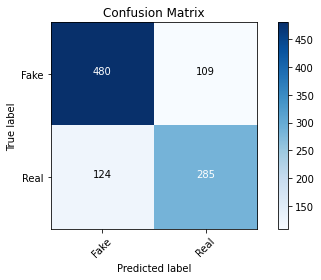

In [73]:
cm = metrics.confusion_matrix(YTest, prediction)
plotConfusionMatrix(cm, classes=['Fake', 'Real'])

### 4: Output data

In [74]:
import pickle

In [75]:
pickle.dump(classifier, open('model2.pkl', 'wb'))

In [76]:
pickle.dump(TFIDF, open('TFIDFvectors2.pkl', 'wb'))


## Areas to Improve: 
*   More preprocessing processes to make the train text data less redundant. 
*   Better classification models to improve accuracy score. 

